# Introduction to Data Analytics Code Cleaning Exercise

### In the world of data analytics, cleaning and preprocessing raw data is a crucial step before any meaningful analysis can take place. One common challenge in this process is dealing with missing values, often represented as NaNs. These missing values can adversely affect the accuracy and reliability of any analysis or modeling efforts.

### To address this issue, we will explore techniques for handling missing values and imputing appropriate values in Python using the powerful libraries, Matplotlib and Pandas. Matplotlib is a popular data visualization library, while Pandas provides efficient data manipulation tools.

### In this code cleaning exercise, we will focus on three key steps: identifying missing values, handling missing values by either removing or imputing them, and validating the effectiveness of our approach. By the end of this exercise, you will have a clean and prepared dataset ready for further analysis or modeling.  This also includes a  little bit of PCA!  



In [1]:
import numpy as np
import pandas as pd 
from pandas import DataFrame
import scipy.stats as stats
import matplotlib as plt
import missingno as msno
import seaborn as sns
from sklearn.decomposition import PCA



In [2]:
churndata = pd.read_csv('CleanInput.csv')  #dirty data

In [3]:
churndata.to_csv('TreatedData.csv') #Treated data.  This is updated often in this program, after every major step.

In [4]:
churndata.shape

(10000, 52)

## Look for duplicates

In [5]:
churndata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 52 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            10000 non-null  int64  
 1   CaseOrder             10000 non-null  int64  
 2   Customer_id           10000 non-null  object 
 3   Interaction           10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  Timezone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              7505 non-null   float64
 15  Age                 

## No duplicates found

In [6]:
churndata.duplicated().value_counts()

False    10000
dtype: int64

## Look for duplicates without the first 2 columns(those are unique)

In [7]:
churndata.duplicated().value_counts()

False    10000
dtype: int64

### There are absolutely NO duplicates


## Detection of Missing Data

### Data visualization of missing data using missingno

In [8]:
#msno.matrix(churndata, fontsize=12,labels=True)

### Listing of null data in the table

In [9]:
churndata.isnull().sum()

Unnamed: 0                 0
CaseOrder                  0
Customer_id                0
Interaction                0
City                       0
State                      0
County                     0
Zip                        0
Lat                        0
Lng                        0
Population                 0
Area                       0
Timezone                   0
Job                        0
Children                2495
Age                     2475
Education                  0
Employment                 0
Income                  2490
Marital                    0
Gender                     0
Churn                      0
Outage_sec_perweek         0
Email                      0
Contacts                   0
Yearly_equip_failure       0
Techie                  2477
Contract                   0
Port_modem                 0
Tablet                     0
InternetService            0
Phone                   1026
Multiple                   0
OnlineSecurity             0
OnlineBackup  


The two methods of treating missing data are deletion and imputatuion.  

## Dealing with missing data

I created the NULLsubset so that we can specifically look at the data in only the fields with NULL data.

In [10]:
NULLsubset = churndata[[ 'Techie', 'Phone', 'Tenure', 'Bandwidth_GB_Year', 'Children', 'TechSupport', 'Age', 'Income' ]]

In [11]:
NULLsubset.isnull().sum()

Techie               2477
Phone                1026
Tenure                931
Bandwidth_GB_Year    1021
Children             2495
TechSupport           991
Age                  2475
Income               2490
dtype: int64

### Histograms of the NULL data 

array([[<Axes: title={'center': 'Tenure'}>,
        <Axes: title={'center': 'Bandwidth_GB_Year'}>],
       [<Axes: title={'center': 'Children'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Income'}>, <Axes: >]], dtype=object)

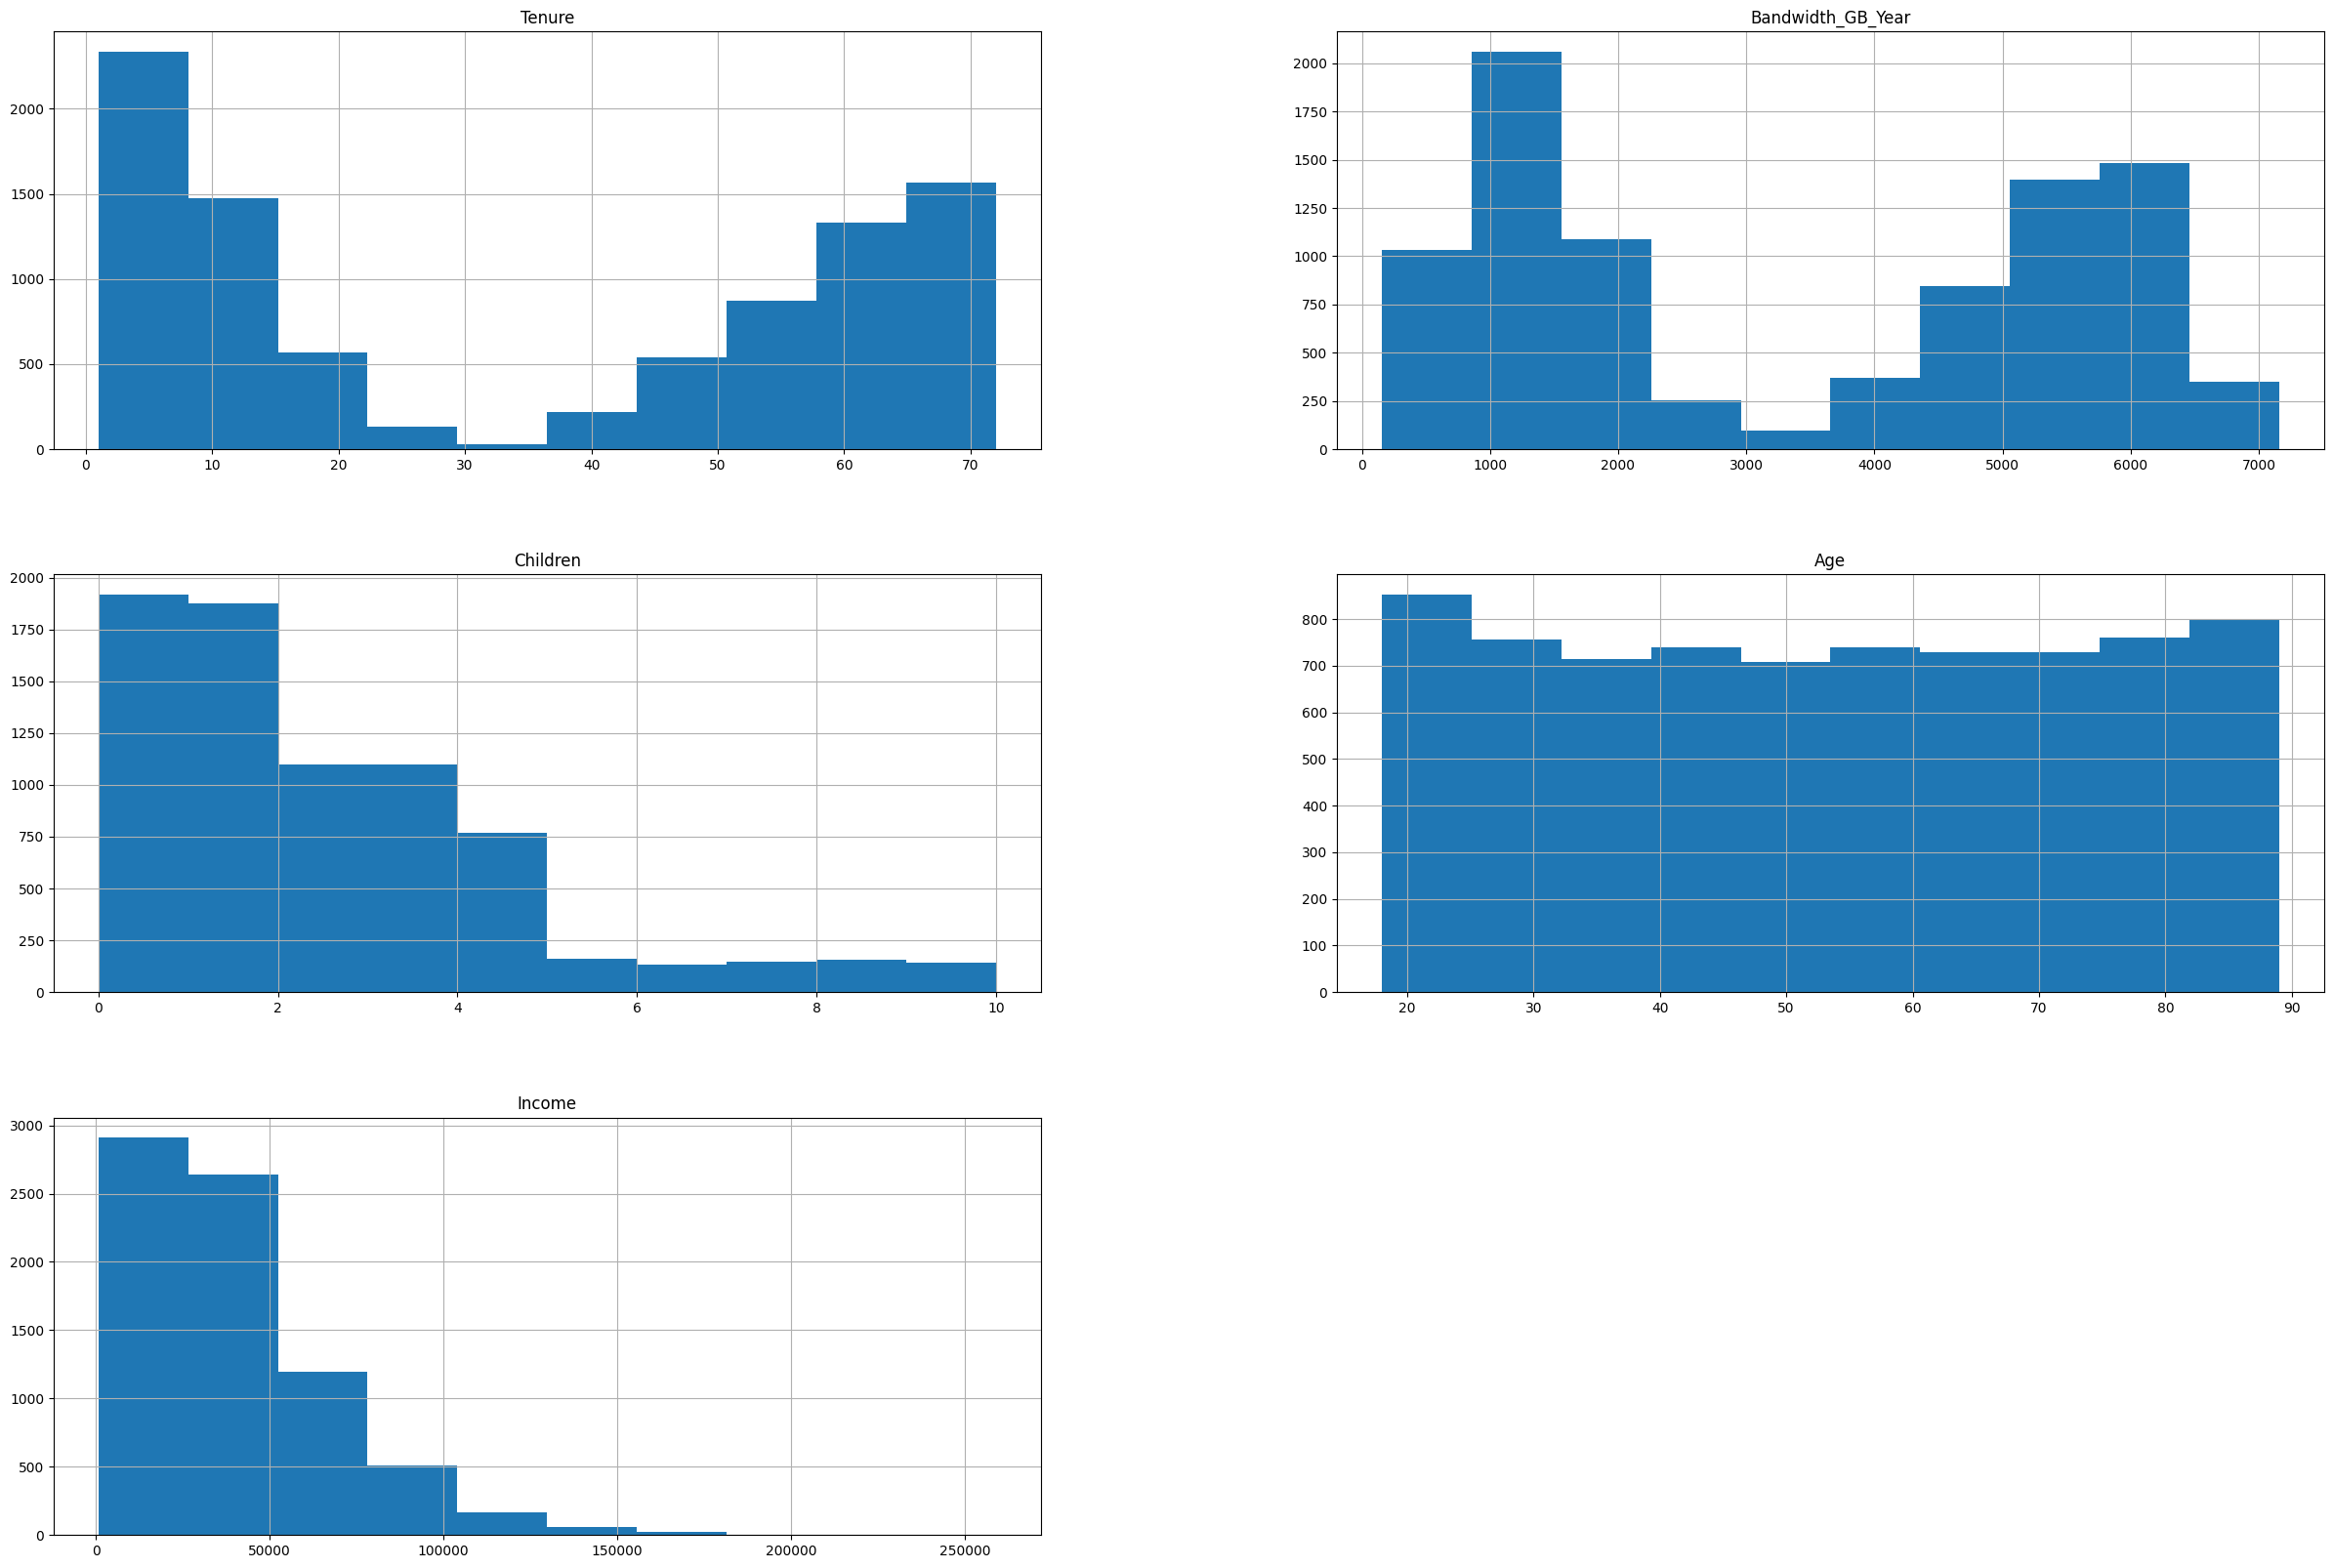

In [12]:
NULLsubset.hist(bins = 10, figsize=(30,20))

<Axes: >

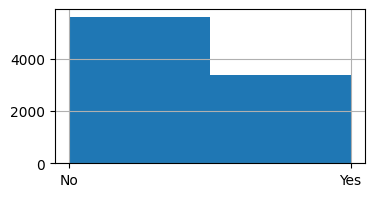

In [13]:
NULLsubset['TechSupport'].hist(bins = 2, figsize=(4,2))

<Axes: >

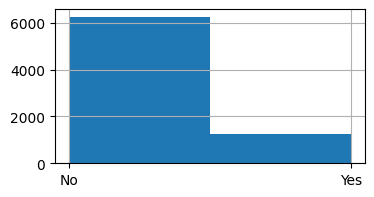

In [14]:
NULLsubset['Techie'].hist(bins = 2, figsize=(4,2))

<Axes: >

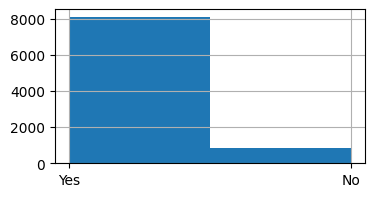

In [15]:
NULLsubset['Phone'].hist(bins = 2, figsize=(4,2))

### Basic information from the columns with NULL data.  The Phone and Techie columns will be dealt with later.  

In [16]:
NULLsubset.describe()

,Tenure,Bandwidth_GB_Year,Children,Age,Income
count,9069.000000,8979.000000,7505.000000,7525.000000,7510.000000
mean,34.498858,3398.842752,2.095936,53.275748,39936.762226
std,26.438904,2187.396807,2.154758,20.753928,28358.469482
min,1.000259,155.506715,0.000000,18.000000,740.660000
25%,7.890442,1234.110529,0.000000,35.000000,19285.522500
50%,36.196030,3382.424000,1.000000,53.000000,33186.785000
75%,61.426670,5587.096500,3.000000,71.000000,53472.395000
max,71.999280,7158.982000,10.000000,89.000000,258900.700000


### Overall interpretations of the graphs and treatment preference


I want to look at the distribution shapes of the seven columns with NULL data and the type of distributuon that each of those graphs has. I will be treating the missing data according to the primary method listed in the lecture based on the inital distribution of the data that contains the missing data.  I will include all of the code and proof that each of the columns with null values were imputed using the prefered treatment method in the sections below.


* The Children graph is positively skewed to the right.  The prefered imputation method for the skewed graph is to impute the median value for the NULL values.
* The Age graph has a uniform distribution meaning it is equally spread with no peaks. The Mean will be imputed for the missing  values since it is the prefered method of imputation for graphs with a uniform distribution.
* The Income graph is positively skewed to the right.  The prefered imputation method for the skewed graph is to impute the median value for the NULL values.
* The TechSupport graph shows that it is a yes no option and there are NULL values in addition. The prefered imputation method for cateforical data is to use the Mode value when imputing data for the NULL values.
* The Techie graph shows that it is a yes no option and there are NULL values in addition. The prefered imputation method for cateforical data is to use the Mode value when imputing data for the NULL values.
* The Phone graph shows that it is a yes no option and there are NULL values in addition.  The prefered imputation method for cateforical data is to use the Mode value when imputing data for the NULL values.
* The Tenure graph has a bimodal distribution and is non-symetric. The prefered imputation method for the skewed graph is to impute the median value for the NULL values.
* The Bandwidth_GB_Year has a bimodal distribution and is non-symetric.  This graph is a bit more symetric than the Tenure graph.  The prefered imputation method for the skewed graph is to impute the median value for the NULL values.





## Treating missing data


I will be treating the missing data according to the primary method listed in the lecture based on the inital distribution of the data that contains the missing data.  

### Children imputation
The Children graph is positively skewed to the right.  The prefered imputation method for the skewed graph is to impute the median value for the NULL values.


In [17]:
churndata["Children"].fillna(churndata["Children"].median(), inplace = True)

The median number of Children is 1.  After running the histogram, you can see that there is a spike at 1 that shows that all of the NULL values were replaced with 1.0.

In [18]:
print(churndata["Children"].median())

1.0


<Axes: >

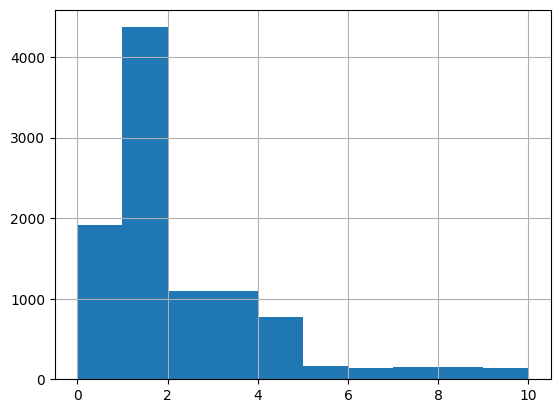

In [19]:
churndata['Children'].hist()

There are no fields in the Children column with NULL values.

In [20]:
churndata['Children'].isnull().sum()

0

### Age imputation

The Age graph has a uniform distribution meaning it is equally spread with no peaks. The Mean will be imputed for the missing  values since it is the prefered method of imputation for graphs with a uniform distribution.   

Since the mean of the Age column is 53.27574750830565, that value will be imputed  for all of the places there are NULL value in that column. To do this, I will use the Fillna function.

In [21]:
churndata["Age"].fillna(churndata["Age"].mean(), inplace = True)

After the Age NULL values were filled with the mean values, there is a difference in the graph with a spike at the Mean value.

<Axes: >

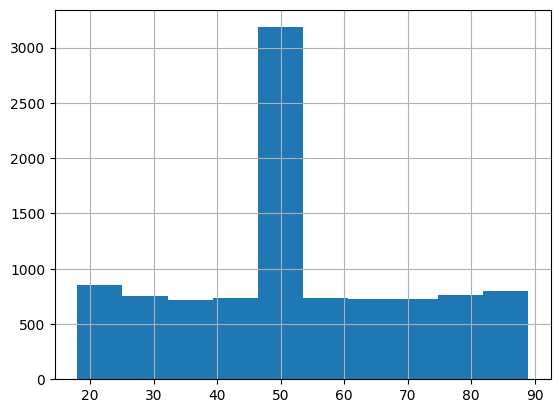

In [22]:
churndata['Age'].hist()

There are no NULL values in the Age column.

In [23]:
churndata['Age'].isnull().sum()

0

The Mean is still 53.275747508309024.

In [24]:
 churndata['Age'].mean()

53.27574750830565

### Income imputation

The Income graph is positively skewed to the right.  The prefered imputation method for the skewed graph is to impute the median value for the NULL values.

In [25]:
print(churndata["Income"].median())

33186.785


In [26]:
churndata["Income"].fillna(churndata["Income"].median(), inplace = True)

After the imputation, the graph is still positively skewed, but you can see a spike aroud the median value below 50,000 dollars. After imputation, the median is still $33,186.785 

<Axes: >

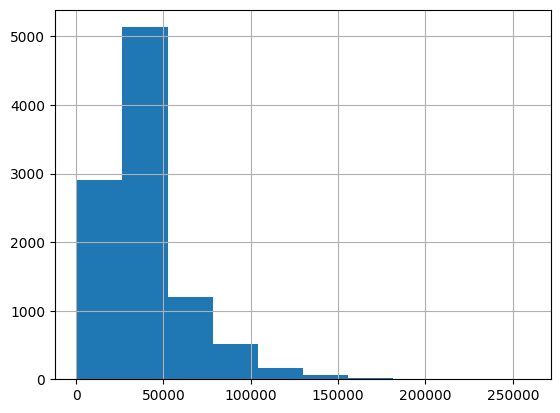

In [27]:
churndata['Income'].hist()

In [28]:
print(churndata["Income"].median())

33186.785


There are no NULL values in the Income column.

In [29]:
churndata['Children'].isnull().sum()

0

### Tenure imputation

The Tenure graph has a bimodal distribution and is non-symetric. The prefered imputation method for the skewed graph is to impute the median value for the NULL values.


In [30]:
print(churndata["Tenure"].median())

36.19603


In [31]:
churndata["Tenure"].fillna(churndata["Tenure"].median(), inplace = True)

After the imputation, the graph still has a bimodal distribuation that is non-symetric, but now there is a spike at the median value.  You can also see that there are now 0 NULL values in the Tenure column.

<Axes: >

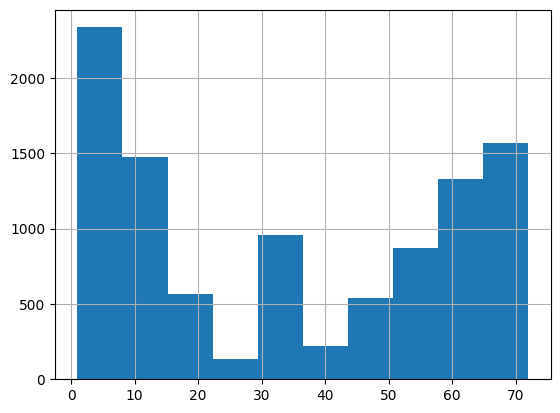

In [32]:
churndata['Tenure'].hist()

In [33]:
churndata['Tenure'].isnull().sum()

0

### Bandwidth_GB_Year imputation

The Bandwidth_GB_Year has a bimodal distribution and is non-symetric.  This graph is a bit more symetric than the Tenure graph.  The prefered imputation method for the skewed graph is to impute the median value for the NULL values.


In [34]:
print(churndata["Bandwidth_GB_Year"].median())

3382.424


In [35]:
churndata["Bandwidth_GB_Year"].fillna(churndata["Bandwidth_GB_Year"].median(), inplace = True)

<Axes: >

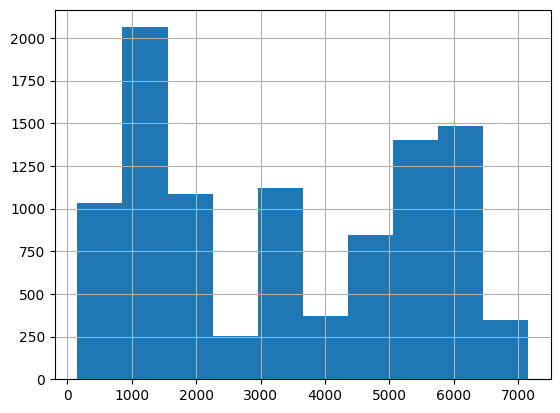

In [36]:
churndata['Bandwidth_GB_Year'].hist()

After the imputation, the graph still has a bimodal distribuation that is non-symetric, but now there is a spike at the median value.  You can also see that there are now 0 NULL values in the Tenure column.

In [37]:
churndata['Bandwidth_GB_Year'].isnull().sum()

0

## TechSupport imputation

In [38]:
print(churndata['TechSupport'].mode())

0    No
Name: TechSupport, dtype: object


In [39]:
churndata['TechSupport'] = churndata['TechSupport'].fillna(churndata['TechSupport'].mode()[0])

The TechSupport graph shows that it is a yes/no option and there are no NULL values in after the imputation. The prefered imputation method for categorical data is to use the Mode value when imputing data for the NULL values. 



<Axes: >

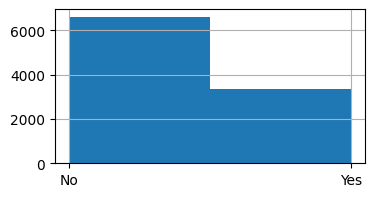

In [40]:
churndata['TechSupport'].hist(bins = 2, figsize=(4,2))

In [41]:
churndata['TechSupport'].isnull().sum()

0

### Techie imputation

The Techie graph shows that it is a yes/no option and there are NULL values in addition. The prefered imputation method for cateforical data is to use the Mode value when imputing data for the NULL values.



In [42]:
print(churndata['Techie'].mode())

0    No
Name: Techie, dtype: object


In [43]:

churndata['Techie'] = churndata['Techie'].fillna(churndata['Techie'].mode()[0])

After the imputation, the graph still has changed a bit and there are more values at the mode value of 0. You can also see that there are now 0 NULL values in the Techie column.

<Axes: >

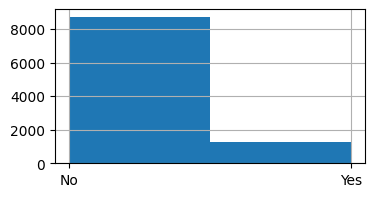

In [44]:
churndata['Techie'].hist(bins = 2, figsize=(4,2))

In [45]:
churndata['Techie'].isnull().sum()

0

### Phone imputation

The Phone graph shows that it is a yes no option and there are NULL values in addition.  The prefered imputation method for categorical data is to use the Mode value when imputing data for the NULL values.


In [46]:
print(churndata['Phone'].mode())

0    Yes
Name: Phone, dtype: object


In [47]:
churndata['Phone'] = churndata['Phone'].fillna(churndata['Phone'].mode()[0])

After the imputation, the graph still has changed a bit and there are more values at the mode value of 0. You can also see that there are now 0 NULL values in the Phone column.

<Axes: >

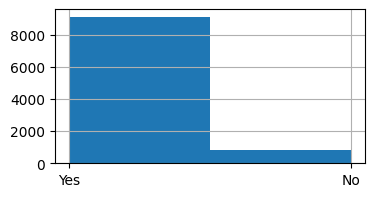

In [48]:
churndata['Phone'].hist(bins = 2, figsize=(4,2))

In [49]:
churndata['Phone'].isnull().sum()

0

### All NULL values from each column have been imputed.

In [50]:
churndata.isnull().sum()

Unnamed: 0              0
CaseOrder               0
Customer_id             0
Interaction             0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
Timezone                0
Job                     0
Children                0
Age                     0
Education               0
Employment              0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMov

### Update the CSV file with imputed data.

In [51]:
churndata.to_csv('TreatedData.csv')

# Outliers


In [52]:
churndata['Z_Score_Income']=stats.zscore(churndata['Income'])

In [53]:
churndata[['Income','Z_Score_Income']].head

<bound method NDFrame.head of          Income  Z_Score_Income
0     28561.990       -0.391731
1     21704.770       -0.668828
2     33186.785       -0.204845
3     18925.230       -0.781148
4     40074.190        0.073471
...         ...             ...
9995  55723.740        0.705863
9996  33186.785       -0.204845
9997  33186.785       -0.204845
9998  16667.580       -0.872379
9999  33186.785       -0.204845

[10000 rows x 2 columns]>

<Axes: >

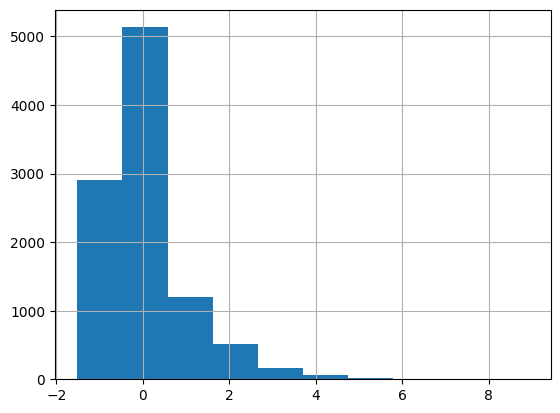

In [54]:
churndata['Z_Score_Income'].hist()


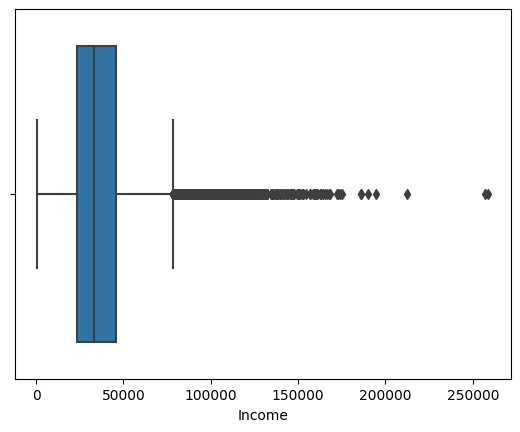

In [55]:
import seaborn
boxplot=seaborn.boxplot(x='Income',data=churndata)

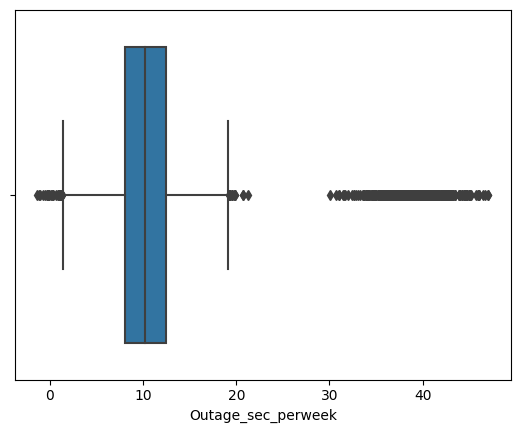

In [56]:
boxplot=seaborn.boxplot(x='Outage_sec_perweek',data=churndata)

<Axes: >

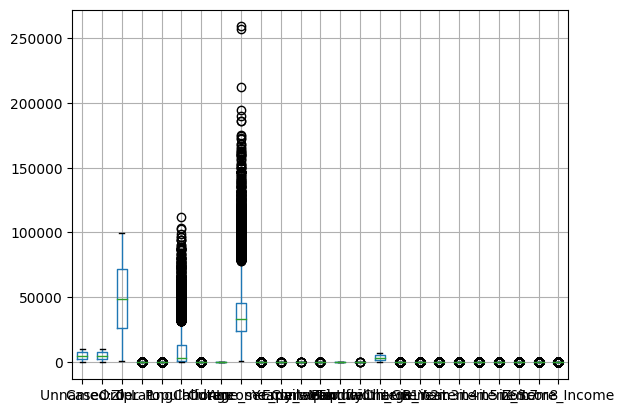

In [57]:
 churndata.boxplot()

<Axes: >

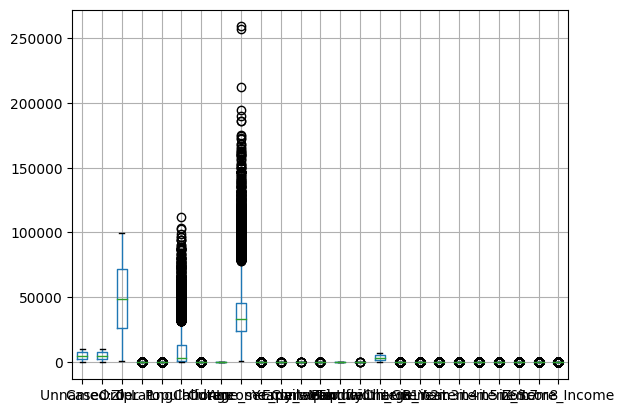

In [58]:
  churndata.boxplot( )

# D4. Mitigating Anomalies

In [59]:
churndata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 53 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            10000 non-null  int64  
 1   CaseOrder             10000 non-null  int64  
 2   Customer_id           10000 non-null  object 
 3   Interaction           10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  Timezone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  float64
 15  Age                 

 ## Code to change the column names of items1 through items8

In [60]:
churndata.rename(columns={'item1':'TimelyResponse'}, inplace=True)

In [61]:
churndata.rename(columns={'item2':'TimelyFixes'}, inplace=True)

In [62]:
churndata.rename(columns={'item3':'TimelyReplacements'}, inplace=True)

In [63]:
churndata.rename(columns={'item4':'Reliability'}, inplace=True)

In [64]:
churndata.rename(columns={'item5':'Options'}, inplace=True)

In [65]:
churndata.rename(columns={'item6':'TimelyFixes'}, inplace=True)

In [66]:
churndata.rename(columns={'item7':'CourteousExchange'}, inplace=True)

In [67]:
churndata.rename(columns={'item8':'ActiveListening'}, inplace=True)

The column names were changed.

In [68]:
churndata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 53 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            10000 non-null  int64  
 1   CaseOrder             10000 non-null  int64  
 2   Customer_id           10000 non-null  object 
 3   Interaction           10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  Timezone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  float64
 15  Age                 

### Update the CSV file to include column name changes

In [69]:
churndata.to_csv('TreatedData.csv')

## Make Customer_id the index for the table.

In [70]:
churndata.set_index('Customer_id')

,Unnamed: 0,CaseOrder,Interaction,City,State,County,Zip,Lat,Lng,Population,...,Bandwidth_GB_Year,TimelyResponse,TimelyFixes,TimelyReplacements,Reliability,Options,TimelyFixes,CourteousExchange,ActiveListening,Z_Score_Income
Customer_id,,,,,,,,,,,,,,,,,,,,,
K409198,1,1,aa90260b-4141-4a24-8e36-b04ce1f4f77b,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,38,...,904.536110,5,5,5,3,4,4,3,4,-0.391731
S120509,2,2,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,10446,...,800.982766,3,4,3,3,4,3,4,4,-0.668828
K191035,3,3,344d114c-3736-4be5-98f7-c72c281e2d35,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,3735,...,2054.706961,4,4,2,4,4,3,3,3,-0.204845
D90850,4,4,abfa2b40-2d43-4994-b15a-989b8c79e311,Del Mar,CA,San Diego,92014,32.96687,-117.24798,13863,...,2164.579412,4,4,4,2,5,4,3,3,-0.781148
K662701,5,5,68a861fd-0d20-4e51-a587-8a90407ee574,Needville,TX,Fort Bend,77461,29.38012,-95.80673,11352,...,271.493436,4,4,4,3,4,4,4,5,0.073471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
M324793,9996,9996,45deb5a2-ae04-4518-bf0b-c82db8dbe4a4,Mount Holly,VT,Rutland,5758,43.43391,-72.78734,640,...,6511.253000,3,2,3,3,4,3,2,3,0.705863
D861732,9997,9997,6e96b921-0c09-4993-bbda-a1ac6411061a,Clarksville,TN,Montgomery,37042,36.56907,-87.41694,77168,...,5695.952000,4,5,5,4,4,5,2,5,-0.204845
I243405,9998,9998,e8307ddf-9a01-4fff-bc59-4742e03fd24f,Mobeetie,TX,Wheeler,79061,35.52039,-100.44180,406,...,4159.306000,4,4,4,4,4,4,4,5,-0.204845


You can see that the index for the table is now Customer_id.

## Remove Unnamed: 0 column from the database.

I tried to use the del command, but that didn't seem to work.  I then ended up using drop.   

In [71]:
churndata =  churndata.drop('Unnamed: 0', axis=1)

In [72]:
churndata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 52 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   City                  10000 non-null  object 
 4   State                 10000 non-null  object 
 5   County                10000 non-null  object 
 6   Zip                   10000 non-null  int64  
 7   Lat                   10000 non-null  float64
 8   Lng                   10000 non-null  float64
 9   Population            10000 non-null  int64  
 10  Area                  10000 non-null  object 
 11  Timezone              10000 non-null  object 
 12  Job                   10000 non-null  object 
 13  Children              10000 non-null  float64
 14  Age                   10000 non-null  float64
 15  Education           

### Update the table to include changes to mitigated anomolies.

In [73]:
churndata.to_csv('TreatedData.csv')

# Principle Component Analysis

In [74]:
TreatedData = pd.read_csv('TreatedData.csv')

I will look at the following values:

In [75]:
PCAdata = TreatedData[['Bandwidth_GB_Year','Income','Children', 'Tenure']]


In [76]:
PCAdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Bandwidth_GB_Year  10000 non-null  float64
 1   Income             10000 non-null  float64
 2   Children           10000 non-null  float64
 3   Tenure             10000 non-null  float64
dtypes: float64(4)
memory usage: 312.6 KB


In [77]:
PCAdata_normalized = (PCAdata-PCAdata.mean())/PCAdata.std()

In [78]:
PCAdata_normalized

,Bandwidth_GB_Year,Income,Children,Tenure
0,-1.202590,-0.391712,-0.427057,-1.106364
1,-1.252550,-0.668795,-0.427057,-1.330280
2,-0.647681,-0.204835,1.130598,-0.750620
3,-0.594672,-0.781109,-0.427057,-0.697684
4,-1.508006,0.073468,-0.946276,-1.309857
...,...,...,...,...
9995,1.502417,0.705827,0.611380,1.331871
9996,1.109068,-0.204835,1.130598,1.047679
9997,0.367700,-0.204835,-0.427057,0.061120
9998,1.481769,-0.872335,-0.427057,1.446968


In [79]:
pca = PCA(n_components=PCAdata.shape[1])

In [80]:
pca

PCA(n_components=4)

In [81]:
pca.fit(PCAdata_normalized)

PCA(n_components=4)

In [82]:
PCAdata2 = pd.DataFrame(pca.transform(PCAdata_normalized),columns=['PC1', 'PC2', 'PC3', 'PC4'])

## PCA Loading Matrix

In [83]:
loadings = pd.DataFrame(pca.components_.T,
columns=['PC1','PC2','PC3','PC4'],
index=PCAdata_normalized.columns)
loadings

,PC1,PC2,PC3,PC4
Bandwidth_GB_Year,0.707074,0.006826,-0.014226,0.706963
Income,0.006109,0.702406,0.711749,0.001431
Children,-0.002253,0.711664,-0.702266,-0.018750
Tenure,0.707109,-0.010627,0.005839,-0.707000


## Selecting the PCs

In [84]:
cov_matrix=np.dot(PCAdata_normalized.T, PCAdata_normalized/PCAdata.shape[0])

In [85]:
eigenvalues= [np.dot(eigenvector.T,np.dot(cov_matrix,eigenvector)) for eigenvector in pca.components_]

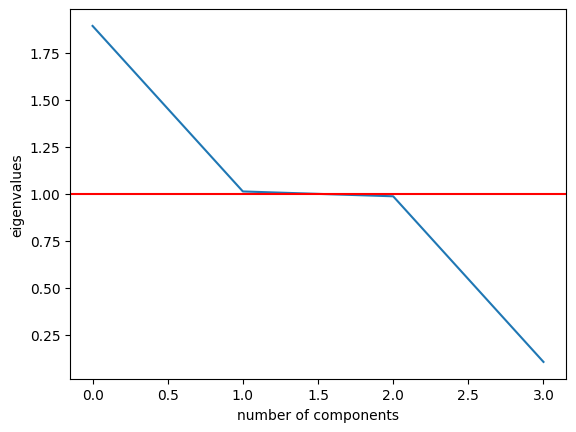

In [86]:
 
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.decomposition import PCA
 

plt.plot(eigenvalues)
plt.xlabel('number of components')
plt.ylabel('eigenvalues')
plt.axhline(y=1,color="red")
plt.show()